In [1]:
import test_config as cfg
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import os, os.path
import pickle
import io

import json

import skimage, skimage.io, skimage.transform, skimage.filters
import sklearn, sklearn.metrics

import importlib

import sys
sys.path.append('../src/')
import modutils
import word_processing as wp

import datetime, time, random

In [2]:
%%time
fname = 'D:/Data/bujo_sample_v2/dataset.json'
extraction_path = os.path.join(os.path.dirname(fname),
                               os.path.basename(fname).split('.')[0])
with open(fname, 'r', encoding='utf-8') as f:
    src = json.load(f)
    
words = wp.extract_words_from_dataset(src, (1,))

src_images = [skimage.io.imread(os.path.join(extraction_path, x[1]), as_grey=True) for x in words]

Wall time: 2.25 s


In [14]:
transforms_cutoff = wp.generate_cutoffs(0.5, 0.9, 5)

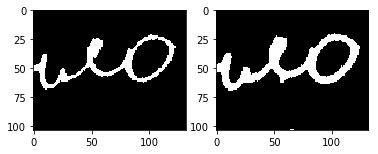

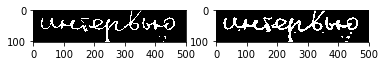

In [16]:
for i in range(2):
    plt.figure()
    plt.subplot(121)
    plt.imshow(wp.perform_transform(src_images[i], transforms_cutoff[0]), cmap='gray')
    plt.subplot(122)
    plt.imshow(wp.perform_transform(src_images[i], transforms_cutoff[-1]), cmap='gray')

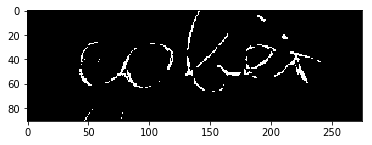

In [5]:
plt.imshow(wp.perform_transform(src_images[10], transforms_cutoff[0]), cmap='gray')

In [ ]:
for i in range(20):
    plt.figure()
    print(np.mean(src_images[i]))
    tmp = np.percentile(src_images[i], 40, axis=1)
    cutoff = np.mean(src_images[i]) * 0.6#np.percentile(tmp, 1)
    plt.imshow(src_images[i] < cutoff, cmap='gray')

In [ ]:
plt.imshow(src_images[10], cmap='gray')

In [ ]:
plt.plot(np.percentile(src_images[10], 50, axis=0))

In [ ]:

transforms_rotation = wp.generate_rotations(-10, 10, 5)
transforms_scale = wp.generate_scales(0.75, 1.25, 5)
transforms_shift = wp.generate_shifts(-0.1, 0.1, 5)
transforms_cutoff = wp.generate_cutoffs(0.3, 0.7, 5)
combinations_all = wp.generate_combinations(transforms_rotation, transforms_shift,
                                       transforms_scale, transforms_cutoff)

fixed_post = [{'type':'trimx'},{'type':'trimy'}, {'type':'resize', 'y':32}]
transforms_all = wp.append_transformations(combinations_all, post_transforms=fixed_post)

test_sample = [np.random.choice(np.arange(len(transforms_all)), size=100) for i in range(len(words))]
